In [27]:
import tkinter as tk
from tkinter import ttk
from tkinter import *
from tkcalendar import DateEntry
import yfinance as yf
import pandas as pd
import numpy as np 
import datetime
import matplotlib.pyplot as plt

In [28]:
def MACD(asset, start, end, ma1, ma2):
    try:
        df = yf.download(asset, start=start, end=end)
    except:
        exception += "Make sure to input a valid ticker symbol./n Make sure Start date is before End Date./n"
    df["EMA" + str(ma1)] = df['Adj Close'].ewm(span=ma1).mean()
    df["EMA" + str(ma2)] = df['Adj Close'].ewm(span=ma2).mean()

    df['MACD Line'] = df["EMA" + str(ma1)] - df["EMA" + str(ma2)]
    df['Signal Line'] = df['MACD Line'].ewm(span=9).mean()

    df['Signal'] = np.where(df['MACD Line'] > df['Signal Line'], 1, 0)
    df['Position'] = df['Signal'].diff()

    df.loc[(df['Position'] == 1), 'Buy'] = "Yes"
    df.loc[(df['Position'] == -1), 'Buy'] = "Sell"

    return df

In [29]:
def getSignals(df):
    Buying_dates = []
    Selling_dates = []

    for i in range(len(df)):
        if df["Buy"].iloc[i] == "Yes": 
            Buying_dates.append(df.iloc[i].name)
        elif df["Buy"].iloc[i] == "Sell":
            Selling_dates.append(df.iloc[i].name)
    return Buying_dates, Selling_dates

In [34]:
security = "MCD"
startDate = "2019-01-01"
endDate = "2021-12-31"
ma1 = 12
ma2 = 27

In [35]:
data = MACD(security, startDate, endDate, ma1, ma2)
buy, sell = getSignals(data)
data

[*********************100%***********************]  1 of 1 completed


,Open,High,Low,Close,Adj Close,Volume,EMA12,EMA27,MACD Line,Signal Line,Signal,Position,Buy
Date,,,,,,,,,,,,,
2019-01-02,175.410004,176.300003,174.169998,176.059998,159.459518,2571500,159.459518,159.459518,0.000000,0.000000,0,NaN,NaN
2019-01-03,175.449997,176.449997,174.410004,174.899994,158.408890,3728200,158.890428,158.914748,-0.024320,-0.013511,0,0.0,NaN
2019-01-04,176.029999,179.199997,175.690002,178.279999,161.470184,3194300,159.897307,159.830407,0.066900,0.019444,1,1.0,Yes
2019-01-07,178.139999,181.880005,178.139999,180.220001,163.227280,3283000,160.948450,160.776223,0.172226,0.071200,1,0.0,NaN
2019-01-08,181.960007,182.289993,179.910004,180.600006,163.571472,2941400,161.661115,161.421042,0.240074,0.121436,1,0.0,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2021-12-23,265.920013,267.369995,265.450012,265.950012,258.630859,1509800,255.085892,250.831880,4.254012,3.979779,1,0.0,NaN
2021-12-27,266.470001,268.260010,266.000000,268.239990,260.857849,1485500,255.973885,251.548021,4.425864,4.068996,1,0.0,NaN
2021-12-28,267.579987,269.220001,267.250000,267.880005,260.507751,1304000,256.671403,252.188002,4.483402,4.151877,1,0.0,NaN


In [37]:
print(len(buy))
len(sell)

38


37

ValueError: x and y must be the same size

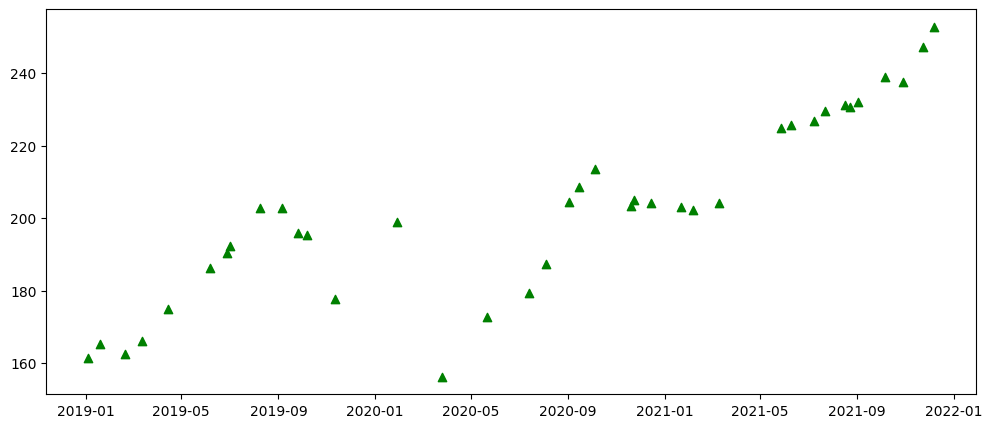

In [36]:
plt.figure(figsize=(12,5))
plt.scatter(data.loc[buy].index, data.loc[buy]['Adj Close'], marker = '^', c='g')
plt.scatter(data.loc[sell].index, data.loc[buy]['Adj Close'], marker = 'v', c='r')
plt.plot(data['Adj Close'], alpha=.07)